# Introdução a Modulação Digital com Áudio

⚠️ Esse codigo não funciona em maquinas virtuais ou no WSL


Sobre esse Laboratório:

- [Setup](#setup)
- [Parametros e Bibliotecas](#parametros-de-configurações)
- [Funções e Metodos](#funções)
- [O Laboratório](#o-laboratório)
    1. [Etapa 1: Compreendendo com a Codificação/Modulação de dados](#etapa-1-compreendendo-com-a-codificaçãomodulação-de-dados)
    1. [Etapa 2: Decodificação](#etapa-2-decodificação)
    1. [Etapa 3: Impacto do Ruído na Comunicação](#etapa-3-impacto-do-ruído-na-comunicação)
    1. [Etapa 4: Decodificação no mundo real](#etapa-4-decodificação-no-mundo-real)



## Setup

⚠️ **Atenção** : Execute o código abaixo **apenas uma vez** para realizar a configuração inicial do ambiente.

In [1]:
!pip install numpy matplotlib soundfile sounddevice scipy

  Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
  Using cached matplotlib-3.5.3-cp37-cp37m-win_amd64.whl (7.2 MB)
  Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl (1.0 MB)


You should consider upgrading via the 'c:\users\rutef\lab-1---redes\.venv\scripts\python.exe -m pip install --upgrade pip' command.


escolhendo a saida e entrada de audio

In [2]:
import os

import sounddevice as sd
import numpy as np
from scipy.io import wavfile

O comando `sd.query_devices()` listará todas as **entradas** e **saídas** de áudio disponíveis no seu computador. 

A partir dessa lista, identifique qual é a sua **entrada** (microfone) e **saída** (alto-falante) de áudio desejada e atribua esses valores às variáveis `input_device` e `output_device`, respectivamente. Por exemplo,

```
   5 LG ULTRAWIDE (HD Audio Driver f, MME (0 in, 2 out)
   6 Alto-falantes (3- Realtek(R) Au, MME (0 in, 2 out)
>  7 Driver de captura de som primário, Windows DirectSound (2 in, 0 out)
   8 Grupo de microfones (3- Tecnologia Intel® Smart Sound para microfones digitais), Windows DirectSound (2 in, 0 out)
   9 Headset (QCY MeloBuds Pro), Windows DirectSound (1 in, 0 out)
< 10 Driver de som primário, Windows DirectSound (0 in, 2 out)
  11 Fones de ouvido (QCY MeloBuds Pro), Windows DirectSound (0 in, 8 out)
  12 LG ULTRAWIDE (HD Audio Driver for Display Audio), Windows DirectSound (0 in, 2 out)
```

Para que o laboratorio funcione adequamente no meu computador devo escolher opcoes 7 , 10.

In [3]:
sd.query_devices()

   0 Mapeador de som da Microsoft - Input, MME (2 in, 0 out)
>  1 Microfone (Realtek(R) Audio), MME (2 in, 0 out)
   2 Mapeador de som da Microsoft - Output, MME (0 in, 2 out)
<  3 Alto-falantes (Realtek(R) Audio, MME (0 in, 2 out)
   4 Driver de captura de som primário, Windows DirectSound (2 in, 0 out)
   5 Microfone (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   6 Driver de som primário, Windows DirectSound (0 in, 2 out)
   7 Alto-falantes (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
   8 Alto-falantes (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
   9 Microfone (Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  10 Mixagem estéreo (Realtek HD Audio Stereo input), Windows WDM-KS (2 in, 0 out)
  11 Microfone (Realtek HD Audio Mic input), Windows WDM-KS (2 in, 0 out)
  12 Headphones (Realtek HD Audio 2nd output), Windows WDM-KS (0 in, 2 out)
  13 Speakers 1 (Realtek HD Audio output with HAP), Windows WDM-KS (0 in, 2 out)
  14 Speakers 2 (Realtek HD Audio output wi

In [4]:
output_device = 3
input_device = 4
sd.default.device = (input_device, output_device)

🎯 Execute o código abaixo para gravar um áudio de 3 segundos e, em seguida, reproduzi-lo.

Caso a gravação ou reprodução não funcione corretamente, ajuste os valores das variáveis `input_device` (dispositivo de entrada) e `output_device` (dispositivo de saída) até que o código funcione como esperado.

In [5]:
DURATION = 3  # duraçao em segundos
SAMPLE_RATE = 44100  # Hz
FILENAME = "captura.wav"

audio = sd.rec(int(DURATION * SAMPLE_RATE), samplerate=SAMPLE_RATE, channels=1, dtype='float32')
sd.wait()
print("Gravação finalizada.")

# Salvando arquivo de audio temporario
max_val = np.max(np.abs(audio))
if max_val > 0:
    scaled = audio / max_val
else:
    scaled = audio
wav_data = np.int16(scaled * 32767)
wavfile.write(FILENAME, SAMPLE_RATE, wav_data)
print(f"Áudio salvo em {FILENAME}")

# Reproduz o áudio salvo
fs, data = wavfile.read(FILENAME)
sd.play(data, fs)
sd.wait()
os.remove(FILENAME)
print('Se você escutou o audio tudo seu sistema está configurado corretamente!')

Gravação finalizada.
Áudio salvo em captura.wav
Se você escutou o audio tudo seu sistema está configurado corretamente!


## Parametros de configurações

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
from scipy import signal
import time

Matplotlib is building the font cache; this may take a moment.


parametros de codificação

In [7]:
##
## configuracoes do audio (detalhes na secção de setup)
##

# output_device = 10
# input_device = 7
output_device = 3
input_device = 4
sd.default.device = (input_device, output_device)

##
## Configurações globais do exercio
##
SAMPLE_RATE = 44100  # Taxa de amostragem do audio
BIT_DURATION = 1.0   # 1 segundo por bit
FREQ_LOW = 440       # bit '0' (Lá)
FREQ_HIGH = 880      # bit '1' (Lá oitava)

## Funções

Nessa secao vocês encontraram as funcoes utilizadas

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
from scipy import signal
import time

### Gerador de tom & visualizacao

In [9]:
def generate_tone(frequency, duration, sample_rate=SAMPLE_RATE):
    """
    Gera um tom senoidal
    
    Args:
        frequency: Frequência em Hz
        duration: Duração em segundos
        sample_rate: Taxa de amostragem
    
    Returns:
        array: Sinal de áudio
    """
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    # Aplica janela para suavizar transições
    tone = np.sin(2 * np.pi * frequency * t)
    # Janela de Hanning para evitar cliques
    window = np.hanning(len(tone))
    return tone * window

In [10]:
def show(data:str,debug):
    if debug==True:
        print(data)

In [11]:
def plot_signal(audio_signal, title, num_bits):
    time_axis = np.linspace(0, len(audio_signal)/SAMPLE_RATE, len(audio_signal))
    
    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, audio_signal)
    plt.title(title)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    
    for i in range(1, num_bits): #divisões dos bits
        plt.axvline(x=i*BIT_DURATION, color='red', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

### Codificadores

In [12]:
def encode_nrz(data_bits,debug=False):
    """
    Codifica dados usando NRZ
    
    Args:
        data_bits: string de bits (ex: "10110")
    
    Returns:
        array: Sinal de áudio codificado
    """
    audio_signal = np.array([])
    
    show(f"Codificando NRZ: {data_bits}",debug)
    
    for i, bit in enumerate(data_bits):
        if bit == '1':
            freq = FREQ_HIGH
            show(f"Bit {i}: '1' -> {freq} Hz",debug)
        else:
            freq = FREQ_LOW
            show(f"Bit {i}: '0' -> {freq} Hz",debug)
        
        tone = generate_tone(freq, BIT_DURATION)
        audio_signal = np.concatenate([audio_signal, tone])
    
    return audio_signal

In [13]:
def encode_nrzi(data_bits, debug=False):
    """
    Codifica dados usando NRZI
    
    Regras:
    - bit '1' -> causa uma transição de nível (muda a frequência)
    - bit '0' -> mantém o mesmo nível (mesma frequência do bit anterior)
    
    Aqui o "nível" é representado pela frequência:
    - estado '0' -> FREQ_LOW
    - estado '1' -> FREQ_HIGH
    """
    audio_signal = np.array([])
    
    current_state = '0'  
    
    show(f"Codificando NRZI: {data_bits}", debug)
    
    for i, bit in enumerate(data_bits):
        if bit == '1':
            current_state = '1' if current_state == '0' else '0'
            show(f"Bit {i}: '1' -> TRANSIÇÃO, novo estado = {current_state}", debug)
        else:
            show(f"Bit {i}: '0' -> SEM transição, estado = {current_state}", debug)
        
        freq = FREQ_HIGH if current_state == '1' else FREQ_LOW
        tone = generate_tone(freq, BIT_DURATION)
        audio_signal = np.concatenate([audio_signal, tone])
    
    return audio_signal


In [39]:
def encode_manchester(data_bits,debug=False):
    """
    Codifica dados usando Manchester
    
    Args:
        data_bits: string de bits
    
    Returns:
        array: Sinal de áudio codificado
    """
    audio_signal = np.array([])
    
    show(f"Codificando Manchester: {data_bits}",debug)
    
    for i, bit in enumerate(data_bits):
        if bit == '1':
            # Bit '1': alto->baixo (primeira metade alta, segunda baixa)
            tone1 = generate_tone(FREQ_HIGH, BIT_DURATION/2)
            tone2 = generate_tone(FREQ_LOW, BIT_DURATION/2)
            show(f"Bit {i}: '1' -> {FREQ_HIGH}Hz -> {FREQ_LOW}Hz",debug)
        else:
            # Bit '0': baixo->alto (primeira metade baixa, segunda alta)
            tone1 = generate_tone(FREQ_LOW, BIT_DURATION/2)
            tone2 = generate_tone(FREQ_HIGH, BIT_DURATION/2)
            show(f"Bit {i}: '0' -> {FREQ_LOW}Hz -> {FREQ_HIGH}Hz",debug)
        
        bit_signal = np.concatenate([tone1, tone2])
        audio_signal = np.concatenate([audio_signal, bit_signal])
    
    return audio_signal

### Decodificadores

#### Detector de frequência

In [15]:
def goertzel_magnitude(samples, target_freq, sample_rate=SAMPLE_RATE):
    """
    Calcula a "força" (magnitude) de uma frequência específica em um sinal,
    usando o algoritmo de Goertzel.
    """
    samples = np.asarray(samples)
    n = len(samples)
    if n == 0:
        return 0.0

    k = int(0.5 + (n * target_freq) / sample_rate)
    omega = 2.0 * np.pi * k / n
    coeff = 2.0 * np.cos(omega)

    s_prev = 0.0
    s_prev2 = 0.0
    for x in samples:
        s = x + coeff * s_prev - s_prev2
        s_prev2 = s_prev
        s_prev = s

    power = s_prev2**2 + s_prev**2 - coeff * s_prev * s_prev2
    return power


def detect_bit_frequency(segment, debug=False):
    """
    Dado um trecho de áudio correspondente a 1 bit,
    decide se é FREQ_LOW ou FREQ_HIGH.
    """
    p_low = goertzel_magnitude(segment, FREQ_LOW, SAMPLE_RATE)
    p_high = goertzel_magnitude(segment, FREQ_HIGH, SAMPLE_RATE)

    if debug:
        print(f"p_low={p_low:.2f}, p_high={p_high:.2f}")

    return FREQ_HIGH if p_high > p_low else FREQ_LOW


Neste trecho de código, vamos utilizar a **Transformada Rápida de Fourier (FFT)** para detectar frequências dominantes em segmentos de áudio — uma ferramenta para análise espectral de sinais. Utilizamos esse conceito em sala de aula para ilustrar o conceito de **modulação por divisão de frequência (FDM)**. Esse codigos detectaram os bits `0` e `1` em razão das fequências que estabelessemos. 

A função `detect_frequency` tem como objetivo identificar as frequências que compõem um sinal de áudio modulado. Na Figura 1, vemos duas senoides (uma azul e uma vermelha), representando frequências distintas associadas aos bits `'0'` e `'1'`. Essas senoides são combinadas para formar o sinal apresentado na Figura 2, o qual será analisado.


| Figura 1 | Figura 2 | 
| :-:   | :-: |
| 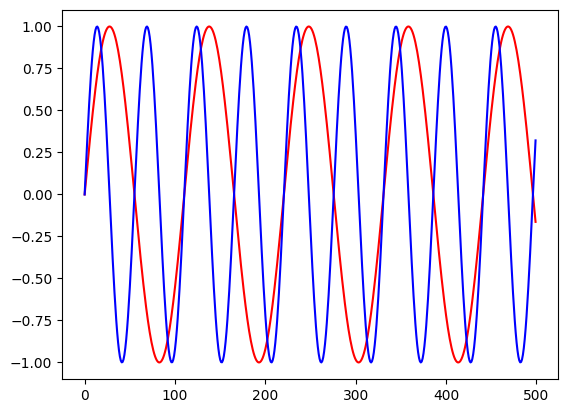 | 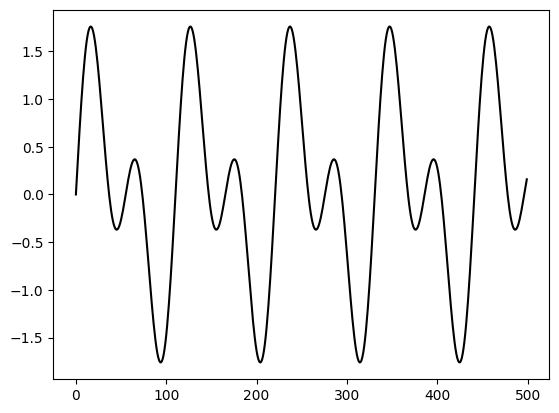 |

O código utiliza a FFT para detectar os picos de frequência presentes no sinal composto. Esses picos — visíveis no gráfico espectral gerado pela FFT (Figura 3) — correspondem exatamente às componentes originais da modulação, permitindo que cada segmento de áudio seja interpretado como `'0'` ou `'1'` com base em qual frequência está presente.

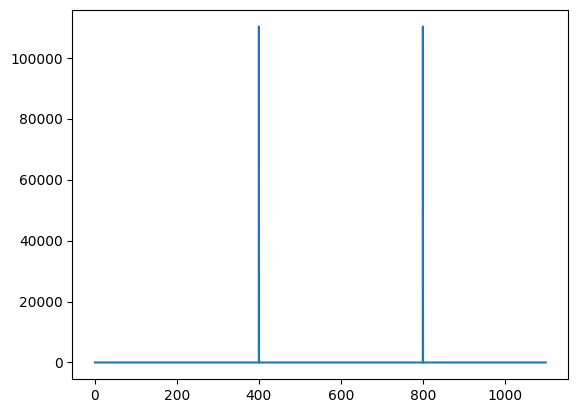

Assim como vimos em sala de aula, essa abordagem ilustra o processo de demodulação por frequência, fundamental no modelo de transmissão FDM (Frequency Division Multiplexing).

Já a função `frequency_to_bit` interpreta a frequência detectada como um bit binário, comparando-a com um limiar: se for superior ao valor definido, retorna `'1'`; caso contrário, `'0'`. Esse processo simula uma decodificação simples de sinais FDM com base na presença de faixas de frequência distintas.


🔧 **Observação**: valores como `SAMPLE_RATE` e o `threshold` devem estar de acordo com as frequências utilizadas (ja configurados no inicio do notebook) durante a modulação para garantir a correta detecção dos dados transmitidos.

In [21]:
def detect_frequency(audio_segment, sample_rate=SAMPLE_RATE):
    """
    Detecta a frequência dominante em um segmento de áudio
    
    Args:
        audio_segment: Segmento de áudio
        sample_rate: Taxa de amostragem
    
    Returns:
        float: Frequência detectada
    """
    # FFT para análise espectral
    fft = np.fft.fft(audio_segment)
    freqs = np.fft.fftfreq(len(fft), 1/sample_rate)
    
    # Considera apenas frequências positivas
    magnitude = np.abs(fft[:len(fft)//2])
    freqs_positive = freqs[:len(freqs)//2]
    
    # Encontra o pico de frequência
    peak_idx = np.argmax(magnitude)
    detected_freq = abs(freqs_positive[peak_idx])
    
    return detected_freq

def frequency_to_bit(frequency, threshold=660):
    """
    Converte frequência detectada em bit
    
    Args:
        frequency: Frequência detectada
        threshold: Limiar para decisão (média entre FREQ_LOW e FREQ_HIGH)
    
    Returns:
        str: '0' ou '1'
    """
    return '1' if frequency > threshold else '0'

#### Decoders

In [17]:
def decode_nrz(audio_signal, num_bits, sample_rate=SAMPLE_RATE,debug=False):
    """
    Decodifica sinal NRZ
    
    Args:
        audio_signal: Sinal de áudio
        num_bits: Número esperado de bits
        sample_rate: Taxa de amostragem
    
    Returns:
        str: Bits decodificados
    """
    samples_per_bit = int(sample_rate * BIT_DURATION)
    decoded_bits = ""
    
    show("Decodificando NRZ:",debug)
    
    for i in range(num_bits):
        start_idx = i * samples_per_bit
        end_idx = start_idx + samples_per_bit
        
        if end_idx > len(audio_signal):
            show(f"Aviso: Áudio muito curto para {num_bits} bits",debug)
            break
        
        # Analisa o meio do bit para evitar transições
        mid_start = start_idx + samples_per_bit // 4
        mid_end = end_idx - samples_per_bit // 4
        segment = audio_signal[mid_start:mid_end]
        
        freq = detect_frequency(segment, sample_rate)
        bit = frequency_to_bit(freq)
        decoded_bits += bit
        
        show(f"Bit {i}: freq={freq:.1f}Hz -> '{bit}'",debug)
    
    return decoded_bits

In [18]:
def decode_nrzi(audio_signal, num_bits, sample_rate=SAMPLE_RATE, debug=False):
    """
    Decodifica sinal NRZI
    
    Estratégia:
    1. Para cada bit, detectamos o "estado" (baixo/alto) analisando a frequência
       - estado '0' -> freq ~ FREQ_LOW
       - estado '1' -> freq ~ FREQ_HIGH
    2. Em NRZI:
       - bit '1'  -> houve TRANSIÇÃO de estado em relação ao bit anterior
       - bit '0'  -> NÃO houve transição (estado igual ao do bit anterior)
    3. Assumimos o primeiro bit como '0' (não houve transição vinda de "antes").
    """
    samples_per_bit = int(sample_rate * BIT_DURATION)
    decoded_bits = ""
    
    show("Decodificando NRZI:", debug)
    
    estados = []  
    
    for i in range(num_bits):
        start_idx = i * samples_per_bit
        end_idx = start_idx + samples_per_bit
        
        if end_idx > len(audio_signal):
            show(f"Aviso: Áudio muito curto para {num_bits} bits", debug)
            break
        
       
        mid_start = start_idx + samples_per_bit // 4
        mid_end = end_idx - samples_per_bit // 4
        segment = audio_signal[mid_start:mid_end]
        
        freq = detect_frequency(segment, sample_rate)
        estado = frequency_to_bit(freq) 
        estados.append(estado)
        
        show(f"Bit {i}: freq={freq:.1f}Hz -> estado={estado}", debug)
    
    if not estados:
        return ""
    
   
    decoded_bits += '0'
    
    for i in range(1, len(estados)):
        if estados[i] != estados[i - 1]:
            decoded_bits += '1'  
        else:
            decoded_bits += '0' 
    
    return decoded_bits


In [ ]:
def decode_manchester(audio_signal, num_bits, sample_rate=SAMPLE_RATE,debug=False):
    """
    Decodifica sinal Manchester
    """
    samples_per_bit = int(sample_rate * BIT_DURATION)
    decoded_bits = ""
    
    show("Decodificando Manchester:",debug)
    
    for i in range(num_bits):
        start_idx = i * samples_per_bit
        end_idx = start_idx + samples_per_bit
        
        if end_idx > len(audio_signal):
            break
        
        mid_point = start_idx + samples_per_bit // 2
        
        first_half = audio_signal[start_idx + samples_per_bit//8 : mid_point - samples_per_bit//8]
        freq1 = detect_frequency(first_half, sample_rate)
        state1 = frequency_to_bit(freq1)
        
        second_half = audio_signal[mid_point + samples_per_bit//8 : end_idx - samples_per_bit//8]
        freq2 = detect_frequency(second_half, sample_rate)
        state2 = frequency_to_bit(freq2)
        
        if state1 == '1' and state2 == '0': 
            bit = '1'  
            show(f"Bit {i}: {freq1:.1f}Hz -> {freq2:.1f}Hz = alto->baixo = '1'",debug)
        elif state1 == '0' and state2 == '1': 
            bit = '0'  
            show(f"Bit {i}: {freq1:.1f}Hz -> {freq2:.1f}Hz = baixo->alto = '0'",debug)
        else: 
            bit = '?'  
            show(f"Bit {i}: {freq1:.1f}Hz -> {freq2:.1f}Hz = ERRO na transição",debug)
        
        decoded_bits += bit
    
    return decoded_bits

In [22]:

import soundfile as sf

caminho_arquivo = "dados_codificados/dados_121210555_44100hz.wav"

audio_matricula, sr = sf.read(caminho_arquivo)
print(f"Taxa de amostragem do arquivo: {sr} Hz")

audio_matricula = audio_matricula.flatten()

samples_por_bit = int(SAMPLE_RATE * BIT_DURATION)
num_bits_estimado = len(audio_matricula) // samples_por_bit

print(f"Comprimento do áudio: {len(audio_matricula)} amostras")
print(f"Samples por bit (estimado): {samples_por_bit}")
print(f"Número estimado de bits na mensagem: {num_bits_estimado}")

print("\nTentando decodificar como NRZ:")
try:
    decoded_nrz_matricula = decode_nrz(audio_matricula, num_bits_estimado)
    print(decoded_nrz_matricula)
except Exception as e:
    print("Erro na decodificação NRZ:", e)

print("\nTentando decodificar como NRZI:")
try:
    decoded_nrzi_matricula = decode_nrzi(audio_matricula, num_bits_estimado)
    print(decoded_nrzi_matricula)
except Exception as e:
    print("Erro na decodificação NRZI:", e)

print("\nTentando decodificar como Manchester:")
try:
    decoded_manchester_matricula = decode_manchester(audio_matricula, num_bits_estimado)
    print(decoded_manchester_matricula)
except Exception as e:
    print("Erro na decodificação Manchester:", e)


Taxa de amostragem do arquivo: 44100 Hz
Comprimento do áudio: 1058400 amostras
Samples por bit (estimado): 44100
Número estimado de bits na mensagem: 24

Tentando decodificar como NRZ:
001110110101001001111111

Tentando decodificar como NRZI:
001001101111101101000000

Tentando decodificar como Manchester:
????????????????????????


In [23]:
def bits_to_text(bits):
    chars = []
    for i in range(0, len(bits), 8):
        byte = bits[i:i+8]
        if len(byte) < 8:
            break
        chars.append(chr(int(byte, 2)))
    return ''.join(chars)

nrz_bits = "001110110101001001111111"
nrzi_bits = "001001101111101101000000"

print("NRZ como texto:", bits_to_text(nrz_bits))
print("NRZI como texto:", bits_to_text(nrzi_bits))


NRZ como texto: ;R
NRZI como texto: &û@


In [ ]:


def mse(a, b):
    n = min(len(a), len(b))
    return np.mean((a[:n] - b[:n])**2)

sinal_nrz  = encode_nrz(decoded_nrz_matricula)
sinal_nrzi = encode_nrzi(decoded_nrzi_matricula)

print("Erro NRZ :", mse(audio_matricula, sinal_nrz))
print("Erro NRZI:", mse(audio_matricula, sinal_nrzi))


Erro NRZ : 3.122591430358487e-10
Erro NRZI: 3.122591430358487e-10


In [25]:
print(decoded_nrz_matricula)
print(decoded_nrzi_matricula)

import numpy as np
print("Bits NRZ == NRZI?", decoded_nrz_matricula == decoded_nrzi_matricula)
print("Sinais NRZ e NRZI iguais?", np.allclose(sinal_nrz, sinal_nrzi))


001110110101001001111111
001001101111101101000000
Bits NRZ == NRZI? False
Sinais NRZ e NRZI iguais? True


## O Laboratório

In [ ]:
##
## configuracoes do audio (detalhes na secção de setup)
##
# output_device = 10
# input_device = 7
output_device = 3
input_device = 4
sd.default.device = (input_device, output_ddef decode_nrz(...):
evice)

##
## Configurações globais do exercio
##
SAMPLE_RATE = 44100  # Taxa de amostragem do audio
BIT_DURATION = 1.0   # 1 segundo por bit
FREQ_LOW = 440       # bit '0' (Lá)
FREQ_HIGH = 880      # bit '1' (Lá oitava)

### Etapa 1: Compreendendo com a Codificação/Modulação de dados

Nessa seção você deve se familiariazar com algumas das funações de codificação (modulação) vista em sala de aula

In [ ]:
test_bits = "11001"
print(f"Dados originais: {test_bits}\n")

In [ ]:
# Testa cada modulação
print("1. NRZ:")
nrz_signal = encode_nrz(test_bits,debug=True)

print("\n3. Manchester:")
manchester_signal = encode_manchester(test_bits,debug=True)

**Escutando os dados** como a nossa proposta é utilizar notas músicais (som) para representar `0` e `1`. Vamos escutalos.

In [ ]:
sd.play(manchester_signal, SAMPLE_RATE)
sd.wait()

In [ ]:
sd.play(nrz_signal, SAMPLE_RATE)
sd.wait()

Você pode visualizar a modulação utilizando plots, com abaixo

In [ ]:
plot_signal(nrz_signal,'NRZ',len(test_bits))

##### Esse modulação foi utilizada nos primórdios da internet (internet discada)

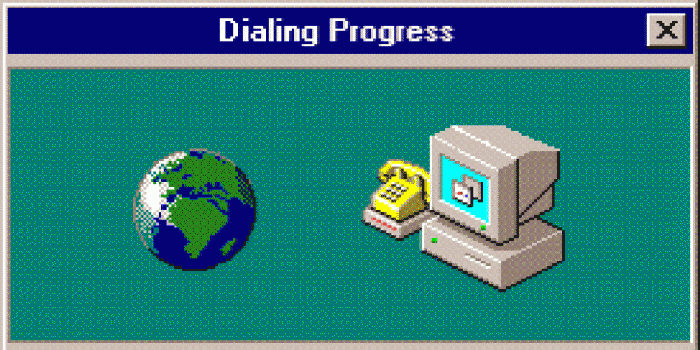

A internet discada utilizava modulação analógica para transportar dados digitais pela linha telefônica. Nos primeiros modems — como os que seguiram o padrão Bell 103 — a técnica predominante foi a Frequency Shift Keying (FSK), onde duas frequências distintas (uma para o bit 0 e outra para o bit 1) eram usadas para representar os dados.

Para quem não teve a oportunidade de utilizar a internet discada o video abaixo ilustra bem o processo de modulação utilizada

<iframe width="560" height="315" src="https://www.youtube.com/embed/ofVEEWObx_I?si=VzAD8hgPPeyXFSRn" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### Etapa 2: Decodificação

Nesta etapa vocês irão  recuperar os dados originais a partir do sinal de áudio recebido. Este é o papel do receptor em um sistema de comunicação.

O promeiro passo para a decodificação (demodulação) em um mundo ideal é salvar o resultado da modulação em um arquivo de audio (.wav)

In [ ]:
# Dados de teste
test_data = "1010100000001111110000010101010111000"

print(f"Criando arquivos de teste para: {test_data}")

# NRZ
nrz_signal = encode_nrz(test_data)
sf.write('teste_nrz.wav', nrz_signal, SAMPLE_RATE)
print("\t ✓ Arquivo teste_nrz.wav criado")

# Manchester
manchester_signal = encode_manchester(test_data)
sf.write('teste_manchester.wav', manchester_signal, SAMPLE_RATE)
print("\t ✓ Arquivo teste_manchester.wav criado")


In [ ]:
original_data = test_data

print(f"\nDados originais: {original_data}")
print(f"Número de bits: {len(original_data)}\n")

Para evitar efeitos de atenuação e interferencias vamos realizar a decodificação diretamente do arquivo de audio.

In [ ]:
# Testa decodificação NRZ
print("1. Decodificando NRZ:")
nrz_audio, _ = sf.read('teste_nrz.wav')
decoded_nrz = decode_nrz(nrz_audio, len(original_data))
print(f"Original: {original_data}")
print(f"Decodificado: {decoded_nrz}")
print(f"Correto: {original_data == decoded_nrz}\n")

In [ ]:
# Testa decodificação Manchester
print("3. Decodificando Manchester:")
manchester_audio, _ = sf.read('teste_manchester.wav')
decoded_manchester = decode_manchester(manchester_audio, len(original_data))
print(f"Original: {original_data}")
print(f"Decodificado: {decoded_manchester}")
print(f"Correto: {original_data == decoded_manchester}")

### Etapa 3: Impacto do Ruído na Comunicação

Simulação de decodificação em condições adversas, o metodo abaixo simula a adição de ruído ao sinal.

In [ ]:
def adicionar_ruido(audio_signal, snr_db=-12):
    """
    Adiciona ruído gaussiano ao sinal
    
    Args:
        audio_signal: Sinal original
        snr_db: Relação sinal-ruído em dB
    
    Returns:
        array: Sinal com ruído
    """
    signal_power = np.mean(audio_signal ** 2)
    
    snr_linear = 10 ** (snr_db / 10)
    noise_power = signal_power / snr_linear
    
    noise = np.random.normal(0, np.sqrt(noise_power), len(audio_signal))
    
    return audio_signal + noise

Para adicionar ruido utilize um valor **negativo** no `snr_db`. Por exemplo se você quiser um ruido de 3db utilize `snr_db=-3` no metodo.

A baixo veja a menssagem original

In [ ]:
original_bits = "00111000"

In [ ]:
snr=-3

clean_signal = encode_nrz(original_bits)

noisy_signal = adicionar_ruido(clean_signal, snr)
decoded = decode_nrz(noisy_signal, len(original_bits))
print(f"  Original: {original_bits}")
print(f"  Decodificado: {decoded}")
print(f"  Correto: {original_bits == decoded}\n")

In [26]:
def contar_erros(bits_originais: str, bits_decodificados: str) -> int:
    """
    Conta quantos bits diferem entre a mensagem original e a decodificada.
    Se o tamanho for diferente, os bits extras contam como erro.
    """
    n = min(len(bits_originais), len(bits_decodificados))
    erros = 0
    for i in range(n):
        if bits_originais[i] != bits_decodificados[i]:
            erros += 1
    
    erros += abs(len(bits_originais) - len(bits_decodificados))
    return erros

In [ ]:
def experimento_snr(
    bits_mensagem: str, 
    encode_fn, 
    decode_fn, 
    nome_modulacao: str,
    snr_values
):
    """
    Executa o experimento de ruído para uma modulação:
    - bits_mensagem: string de bits
    - encode_fn: encode_nrz / encode_nrzi / encode_manchester
    - decode_fn: decode_nrz / decode_nrzi / decode_manchester
    - nome_modulacao: texto pra identificar nos prints e no gráfico
    - snr_values: lista/array de valores de SNR em dB
    """
    num_bits = len(bits_mensagem)
    sinal_limpo = encode_fn(bits_mensagem)

    erros_por_snr = []

    for snr_db in snr_values:
        sinal_ruidoso = adicionar_ruido(sinal_limpo, snr_db)
        bits_decod = decode_fn(sinal_ruidoso, num_bits)
        erros = contar_erros(bits_mensagem, bits_decod)
        erros_por_snr.append(erros)
        print(f"{nome_modulacao} | SNR = {snr_db:>3} dB -> erros = {erros}")

    plt.figure(figsize=(8, 4))
    plt.plot(snr_values, erros_por_snr, marker='o')
    plt.title(f"Erros de bit x SNR ({nome_modulacao})")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Número de erros de bit")
    plt.grid(True, alpha=0.3)
    plt.show()

    return erros_por_snr

In [ ]:
import numpy as np

def adicionar_ruido(sinal, snr_db):
    """
    Adiciona ruído gaussiano branco ao sinal para atingir
    o SNR desejado (em dB).
    """
    potencia_sinal = np.mean(sinal**2)

    snr_linear = 10 ** (snr_db / 10)

    potencia_ruido = potencia_sinal / snr_linear

    ruido = np.sqrt(potencia_ruido) * np.random.randn(len(sinal))

    return sinal + ruido


NRZ | SNR =  20 dB -> erros = 0
NRZ | SNR =  15 dB -> erros = 0
NRZ | SNR =  10 dB -> erros = 0
NRZ | SNR =   5 dB -> erros = 0
NRZ | SNR =   0 dB -> erros = 0
NRZ | SNR =  -5 dB -> erros = 0
NRZ | SNR = -10 dB -> erros = 0
NRZ | SNR = -15 dB -> erros = 0
NRZ | SNR = -20 dB -> erros = 0
NRZ | SNR = -25 dB -> erros = 0
NRZ | SNR = -30 dB -> erros = 7
NRZ | SNR = -35 dB -> erros = 136
NRZ | SNR = -40 dB -> erros = 172
NRZ | SNR = -45 dB -> erros = 190
NRZ | SNR = -50 dB -> erros = 185


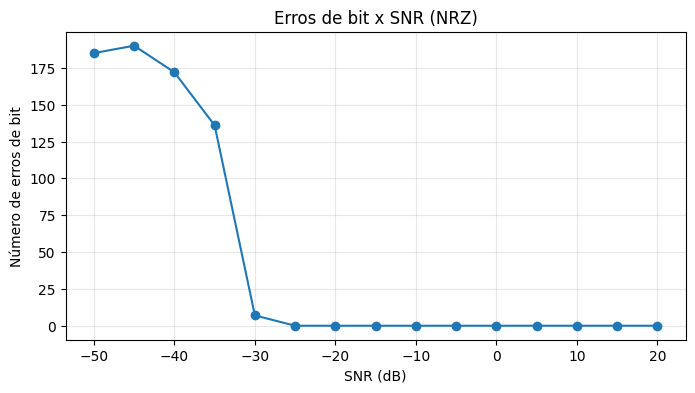

In [ ]:

bits_base = "001110110101001001111111"  
bits_mensagem = bits_base * 20      

snr_values = np.arange(20, -51, -5) 
erros_nrz = experimento_snr(
    bits_mensagem=bits_mensagem,
    encode_fn=encode_nrz,
    decode_fn=decode_nrz,
    nome_modulacao="NRZ",
    snr_values=snr_values
)


NRZI | SNR =  20 dB -> erros = 0
NRZI | SNR =  15 dB -> erros = 0
NRZI | SNR =  10 dB -> erros = 0
NRZI | SNR =   5 dB -> erros = 0
NRZI | SNR =   0 dB -> erros = 0
NRZI | SNR =  -5 dB -> erros = 0
NRZI | SNR = -10 dB -> erros = 0
NRZI | SNR = -15 dB -> erros = 0
NRZI | SNR = -20 dB -> erros = 0
NRZI | SNR = -25 dB -> erros = 0
NRZI | SNR = -30 dB -> erros = 12
NRZI | SNR = -35 dB -> erros = 252
NRZI | SNR = -40 dB -> erros = 284
NRZI | SNR = -45 dB -> erros = 290
NRZI | SNR = -50 dB -> erros = 298


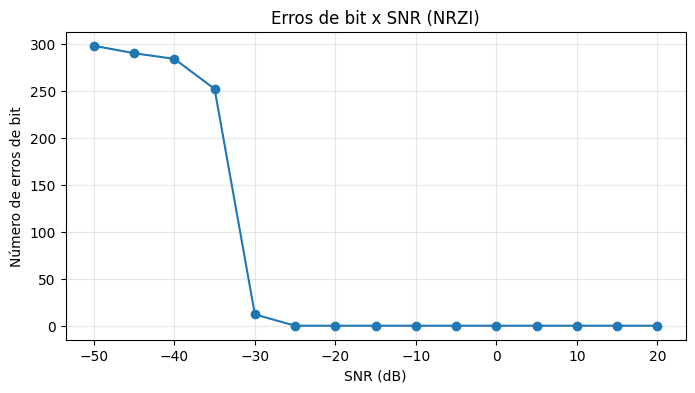

Manchester | SNR =  20 dB -> erros = 0
Manchester | SNR =  15 dB -> erros = 0
Manchester | SNR =  10 dB -> erros = 0
Manchester | SNR =   5 dB -> erros = 0
Manchester | SNR =   0 dB -> erros = 0
Manchester | SNR =  -5 dB -> erros = 0
Manchester | SNR = -10 dB -> erros = 0
Manchester | SNR = -15 dB -> erros = 0
Manchester | SNR = -20 dB -> erros = 0
Manchester | SNR = -25 dB -> erros = 0
Manchester | SNR = -30 dB -> erros = 179
Manchester | SNR = -35 dB -> erros = 436
Manchester | SNR = -40 dB -> erros = 460
Manchester | SNR = -45 dB -> erros = 460
Manchester | SNR = -50 dB -> erros = 465


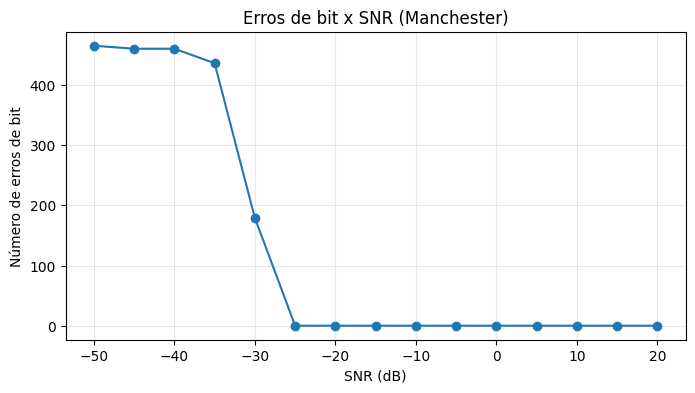

In [ ]:
erros_nrzi = experimento_snr(
    bits_mensagem=bits_mensagem,
    encode_fn=encode_nrzi,
    decode_fn=decode_nrzi,
    nome_modulacao="NRZI",
    snr_values=snr_values
)

erros_manchester = experimento_snr(
    bits_mensagem=bits_mensagem,
    encode_fn=encode_manchester,
    decode_fn=decode_manchester,
    nome_modulacao="Manchester",
    snr_values=snr_values
)


### Etapa 4: Decodificação no mundo real

In [ ]:
def capturar_do_microfone(duracao_segundos):
    """
    Captura áudio do microfone
    
    Args:
        duracao_segundos: Duração da captura
    
    Returns:
        array: Áudio capturado
    """
    print(f"Iniciando captura por {duracao_segundos} segundos...")
    print("Reproduza o áudio no seu celular AGORA!")
    
    # Captura áudio
    audio_capturado = sd.rec(
        int(duracao_segundos * SAMPLE_RATE), 
        samplerate=SAMPLE_RATE, 
        channels=1
    )
    sd.wait()  # Aguarda terminar a captura
    
    print("Captura concluída!")
    return audio_capturado.flatten()

Para este exercício, você deverá utilizar um **segundo dispositivo**, como por exemplo, seu **celular**.

1. Copie o arquivo de áudio [dados_ar.wav](./dados_ar.wav) para o segundo dispositivo.
2. Este áudio contém uma **mensagem de 5 bits**, codificada utilizando o esquema **Manchester**.
3. O desafio consiste em **decodificar essa mensagem utilizando apenas o microfone do seu computador**.  
   **Não abra o arquivo diretamente** no computador — apenas reproduza o áudio no segundo dispositivo.

> 🧪 Certifique-se de que os [procedimentos de configuração](#setup) foram seguidos corretamente e que o microfone do seu computador está funcionando adequadamente.

Por fim, **execute o código abaixo** (referente à etapa de escuta por microfone) e reproduza o áudio no segundo dispositivo para tentar decodificar a mensagem.

In [ ]:
# test_data = "10110"
# Captura áudio

duracao = 5 * BIT_DURATION + 1  # +1 segundo de margem
audio_capturado = capturar_do_microfone(duracao)

# Salva captura para análise
sf.write('captura_microfone.wav', audio_capturado, SAMPLE_RATE)

# Tenta decodificar
print("\nTentando decodificar...")
decoded = decode_manchester(audio_capturado, 5)

print(f"Original: ?????")
print(f"Capturado: {decoded}")